In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin


In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
DATA_DIR  = os.path.join(BASE_DIR, 'data')
METADATA_DIR = os.path.join(BASE_DIR, 'metadata')
FEATURES_DIR = os.path.join(BASE_DIR, 'features')

os.makedirs(FEATURES_DIR, exist_ok=True)

print(BASE_DIR)
print(DATA_DIR)
print(METADATA_DIR)
print(FEATURES_DIR)

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin
/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin/data
/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin/metadata
/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin/features


In [3]:
import numpy as np
import pandas as pd

In [4]:
data = np.load(os.path.join(FEATURES_DIR, 'kincore.npz'), allow_pickle=True)
X, y, metadata = data['X'], data['y'], data['metadata']
df = pd.DataFrame(X, columns=[f"{i+1:04d}" for i in range(X.shape[1])])
target = pd.Series(y, name='target')

In [5]:
from src.eda import (
    get_correlations, get_correlations_pair_matrix, dim_red,
    plot_correlation_coefficients, heatmap_correlations, pairplot
)

In [6]:
plot_correlation_coefficients(get_correlations(df, target))

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin/src/eda.py:56: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeffs.loc["pearson", col] = abs(pearsonr(
/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin/src/eda.py:60: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeffs.loc["spearman", col] = abs(spearmanr(


/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/MLtopKin/src/eda.py:103: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



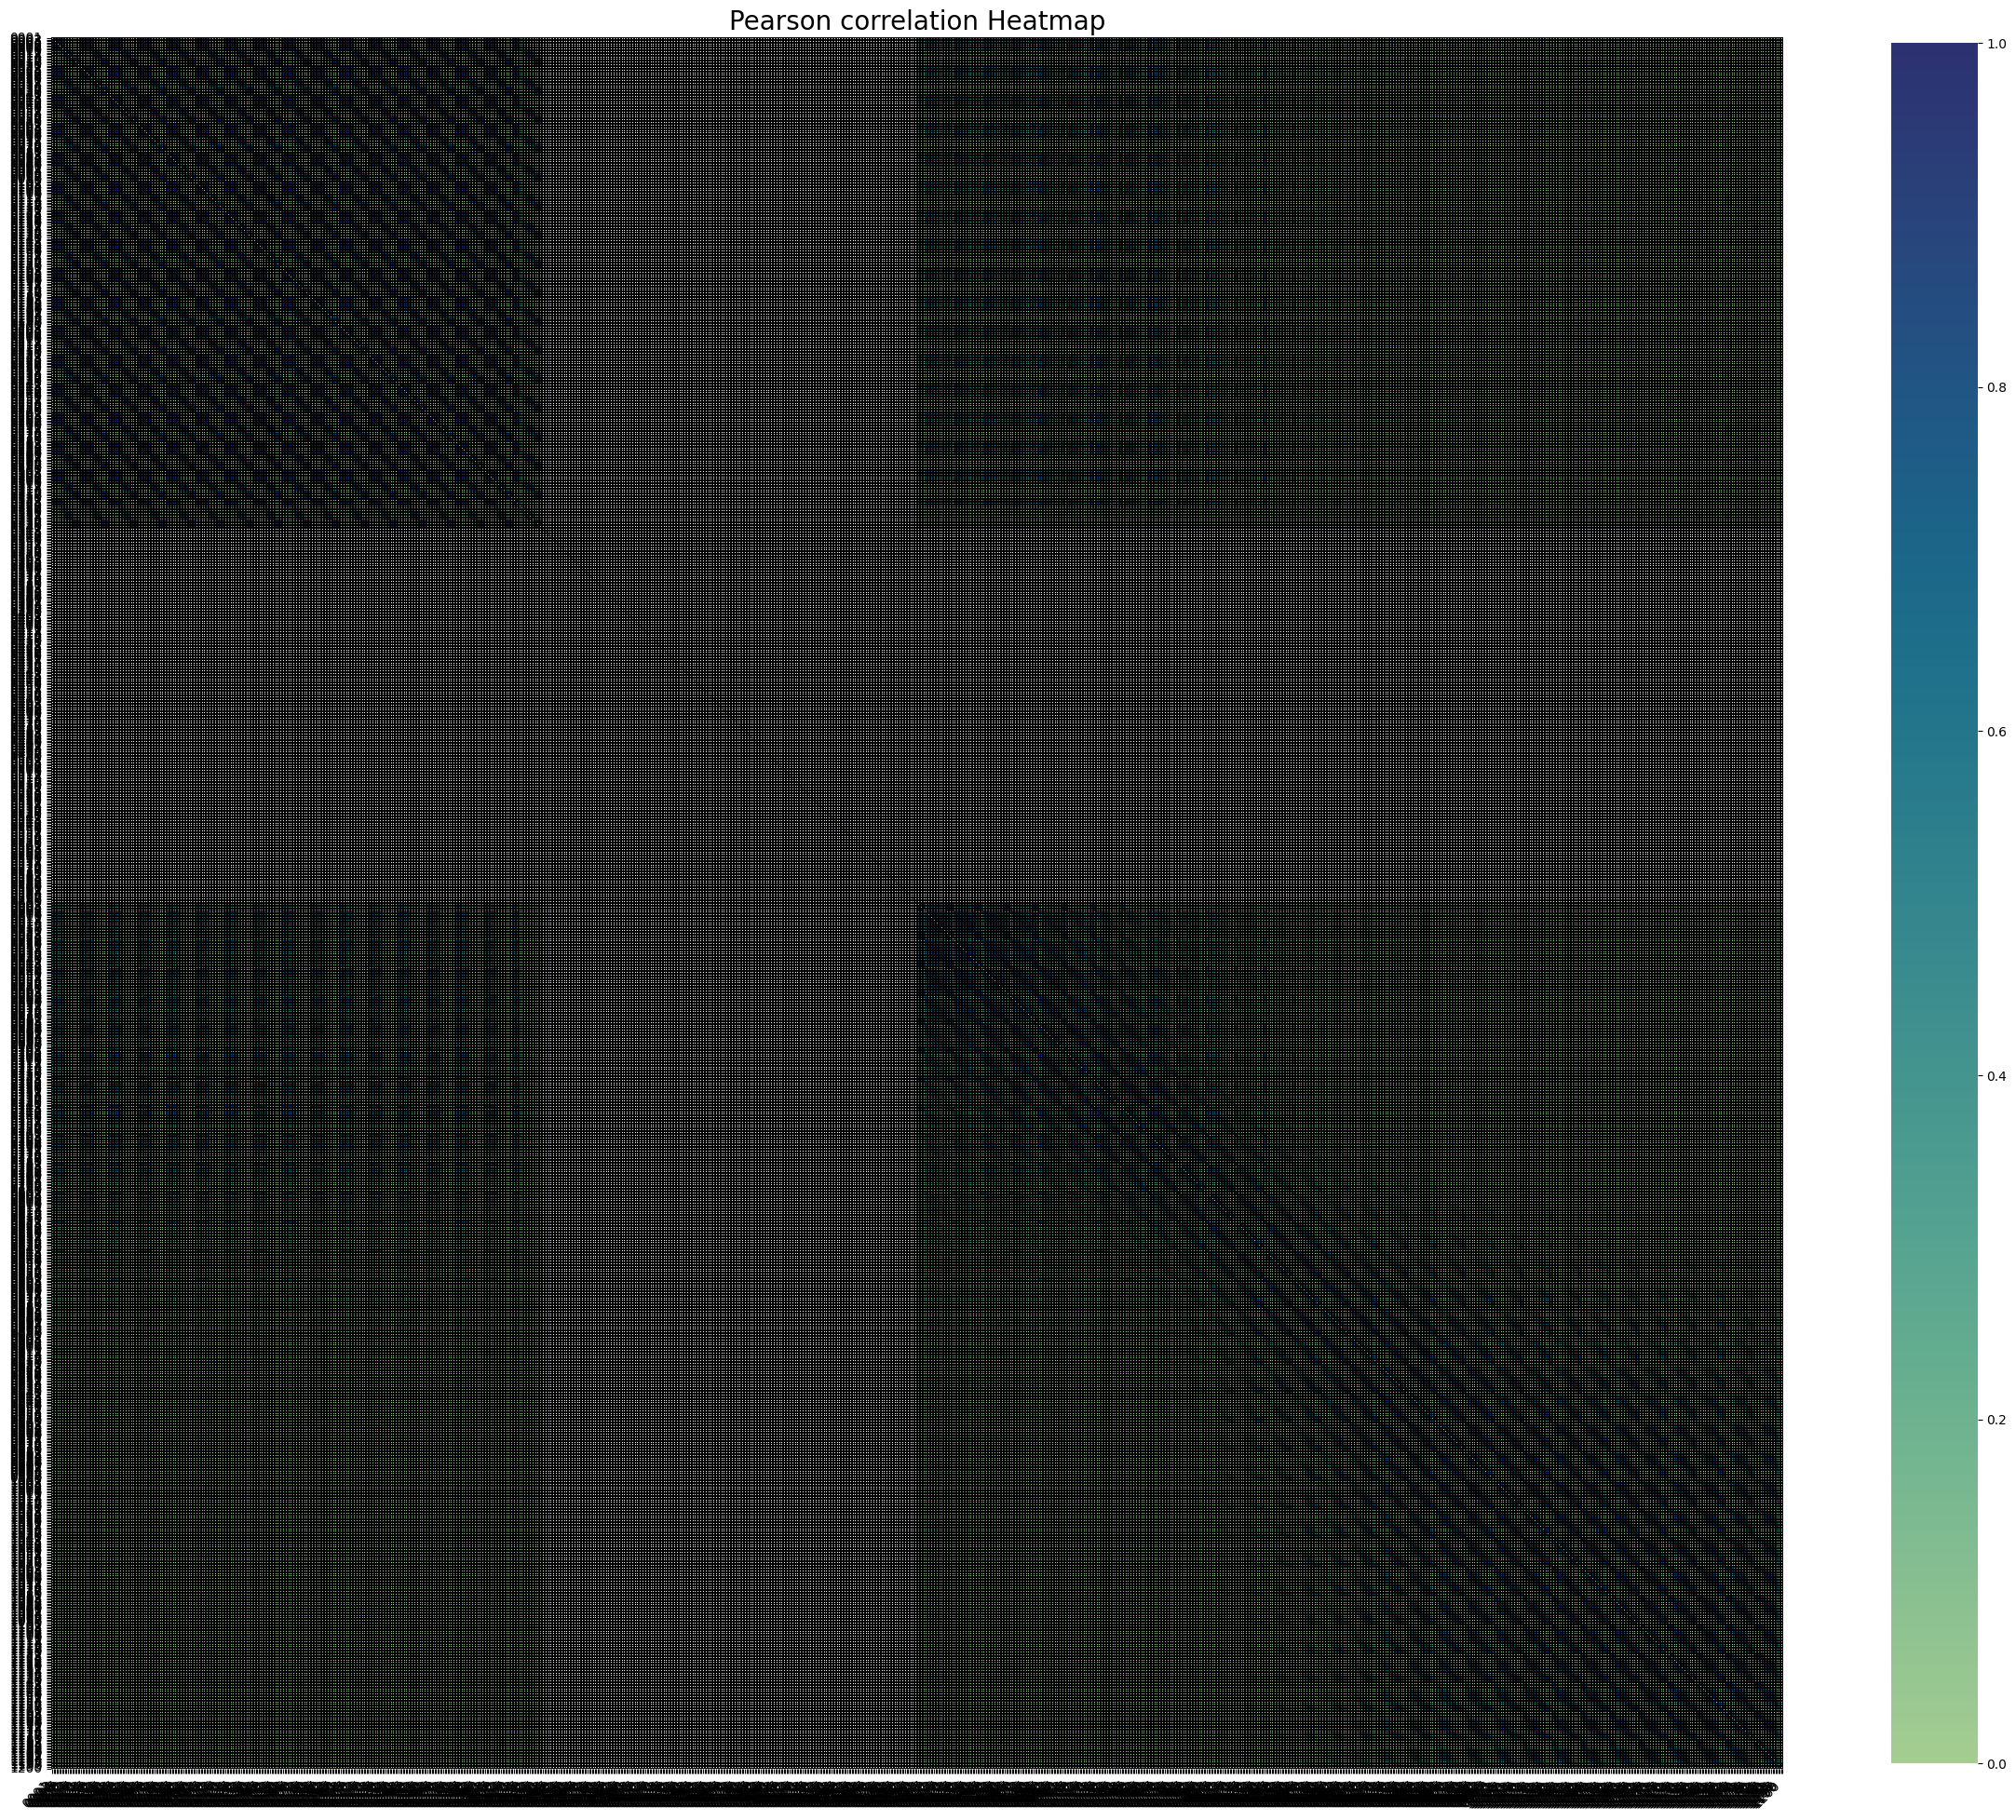

In [7]:
heatmap_correlations(get_correlations_pair_matrix(df), labels=df.columns, figsize=(30, 30))

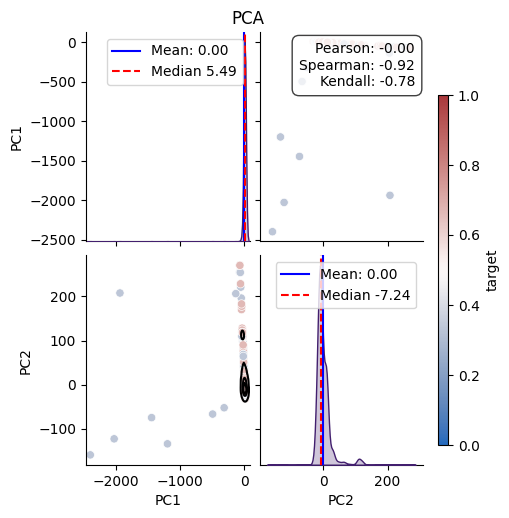

In [8]:
pairplot(
    data=dim_red(df, method="pca", percent=0.99),
    title="PCA",
    hue=target,
    cmap="vlag"
)

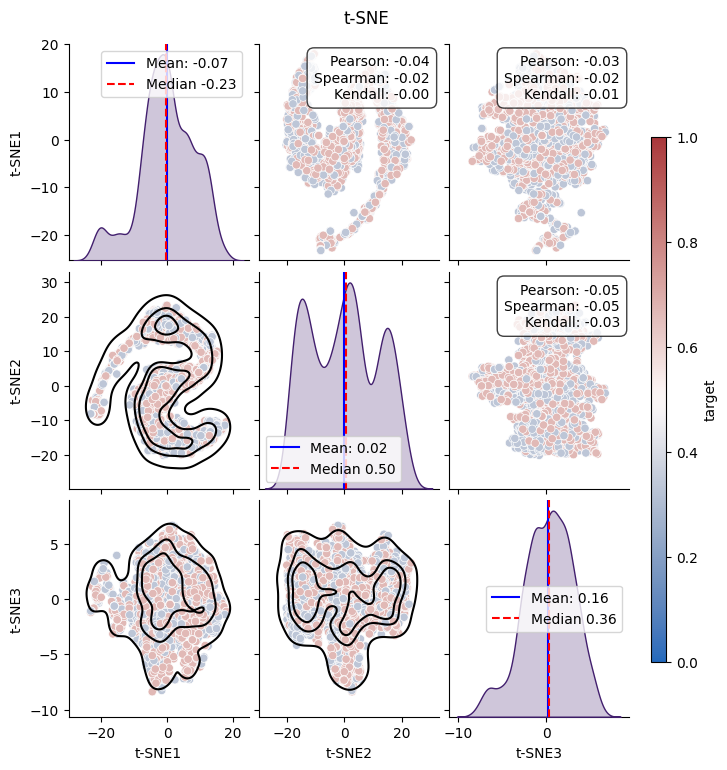

In [9]:
pairplot(
    data=dim_red(df, method="tsne", n_components=3),
    title="t-SNE",
    hue=target,
    cmap="vlag"
)

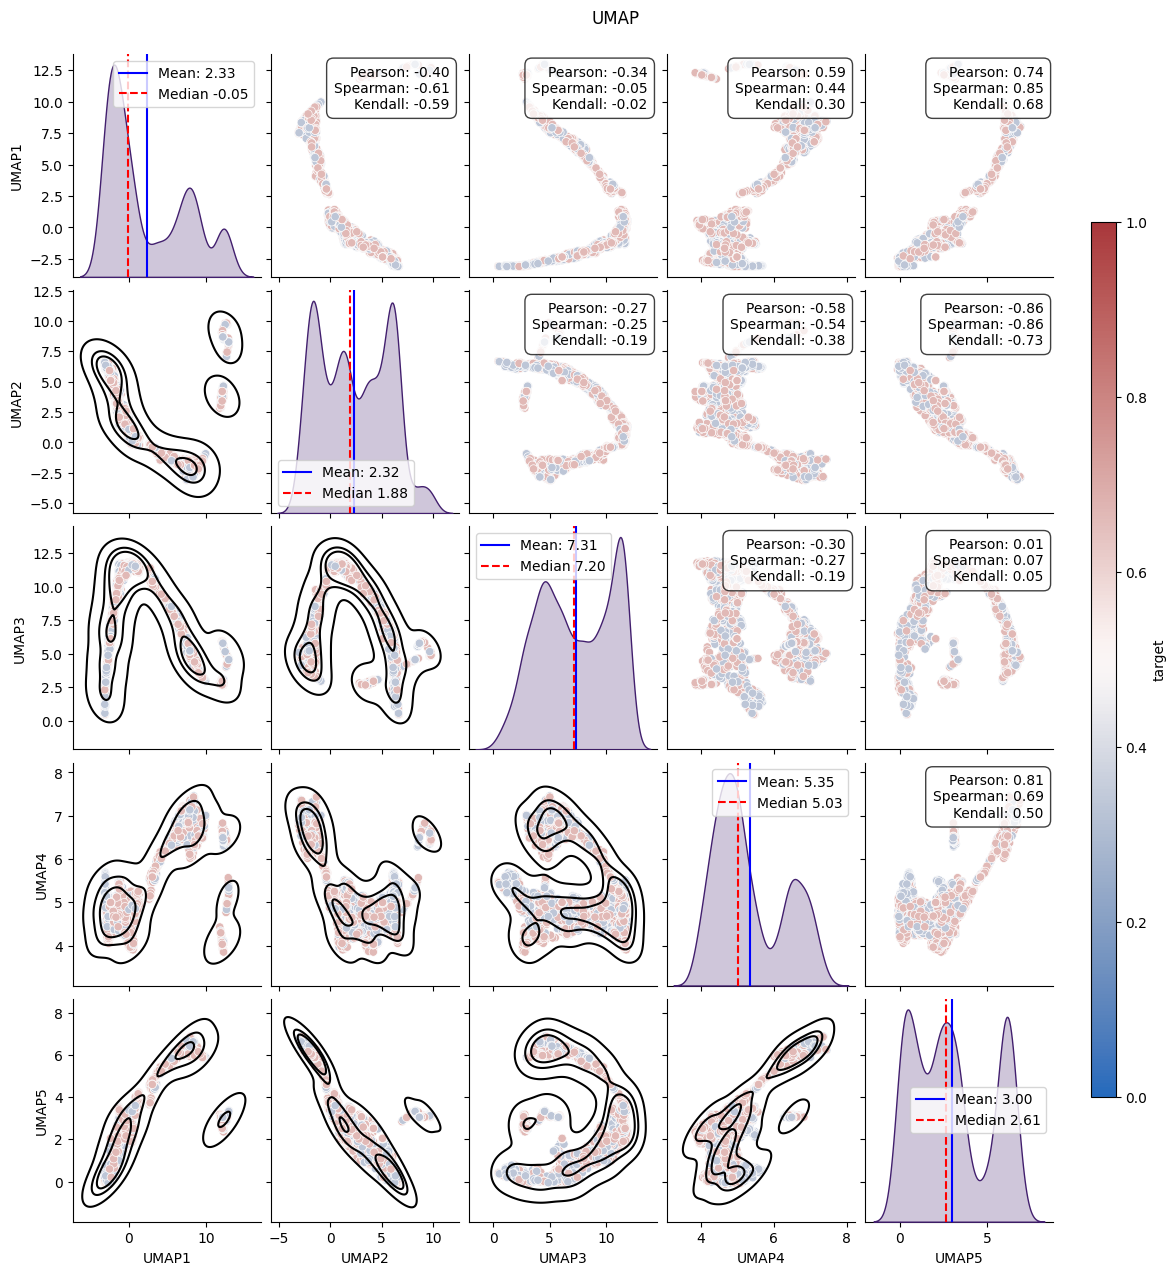

In [10]:
pairplot(
    data=dim_red(df, method="umap", n_components=5),
    title="UMAP",
    hue=target,
    cmap="vlag"
)